In [3]:
from ai_assets import *

In [4]:
path = get_path('raisin', 'Raisin_Dataset.xlsx')
df = pd.read_excel(path)
df.head()

ValueError: Invalid file path or buffer object type: <class 'NoneType'>

<AxesSubplot: >

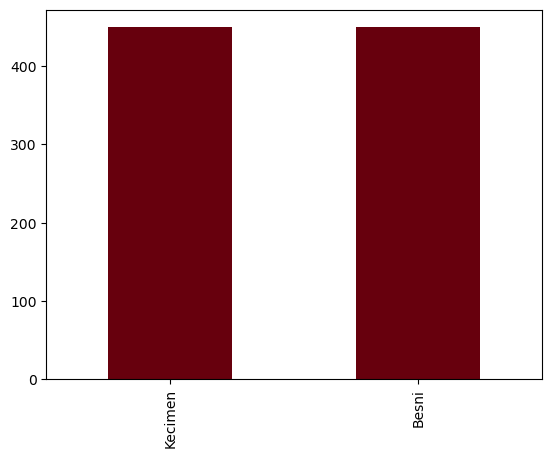

In [4]:
vc = df['Class'].value_counts()
vc.plot.bar(color=plt.cm.Reds(vc.values))

In [5]:
def SuperInfo(df, dropna=False):
    """
    Returns a dataframe consisting of datatypes, nuniques, #s of nulls head(1), most frequent item and its frequncy,
    where the column names are indices.
    """
    dt=pd.DataFrame(df.dtypes, columns=["Type"])
    dn=pd.DataFrame(df.nunique(), columns=["Nunique"])
    nonnull=pd.DataFrame(df.isnull().sum(), columns=["#of Missing"])
    firstT=df.head(1).T.rename(columns={0:"First"})
    MostFreqI=pd.DataFrame([df[x].value_counts().head(1).index[0] for x in df.columns], columns=["MostFreqItem"],index=df.columns)
    MostFreqC=pd.DataFrame([df[x].value_counts().head(1).values[0] for x in df.columns], columns=["MostFreqCount"],index=df.columns)
    return pd.concat([dt,dn,nonnull,MostFreqI,MostFreqC,firstT],axis=1)

In [6]:
SuperInfo(df, dropna=False)

,Type,Nunique,#of Missing,MostFreqItem,MostFreqCount,First
Area,int64,900,0,87524,1,87524
MajorAxisLength,float64,900,0,442.246011,1,442.246011
MinorAxisLength,float64,900,0,253.291155,1,253.291155
Eccentricity,float64,900,0,0.819738,1,0.819738
ConvexArea,int64,896,0,70719,2,90546
Extent,float64,900,0,0.758651,1,0.758651
Perimeter,float64,900,0,1184.04,1,1184.04
Class,object,2,0,Kecimen,450,Kecimen


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


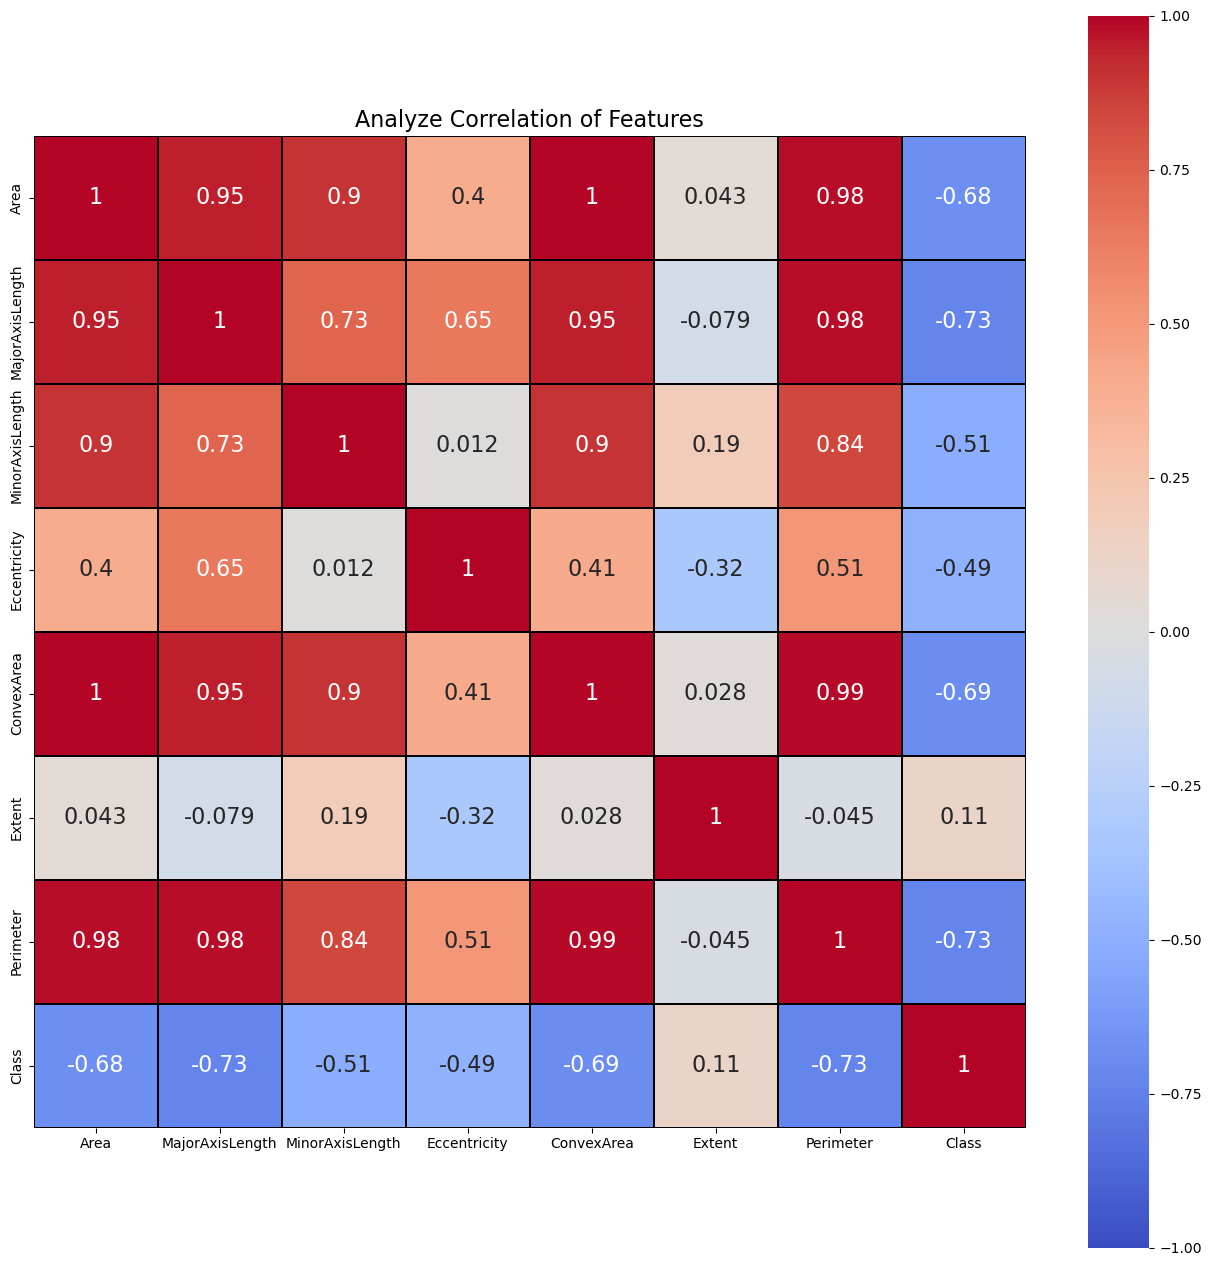

In [8]:
colormap = plt.cm.coolwarm
df_num_class = df
df_num_class.Class = pd.Categorical(df.Class).codes
plt.figure(figsize=(16, 16))
plt.title("Analyze Correlation of Features", y = 1.0, size = 16)
sns.heatmap(df_num_class.astype(float).corr(method='spearman'), linewidths = 0.1, vmin=-1., vmax = 1.0,
           square = True, cmap = colormap, linecolor = "black", annot = True, annot_kws = {"size" : 16})
plt.show()

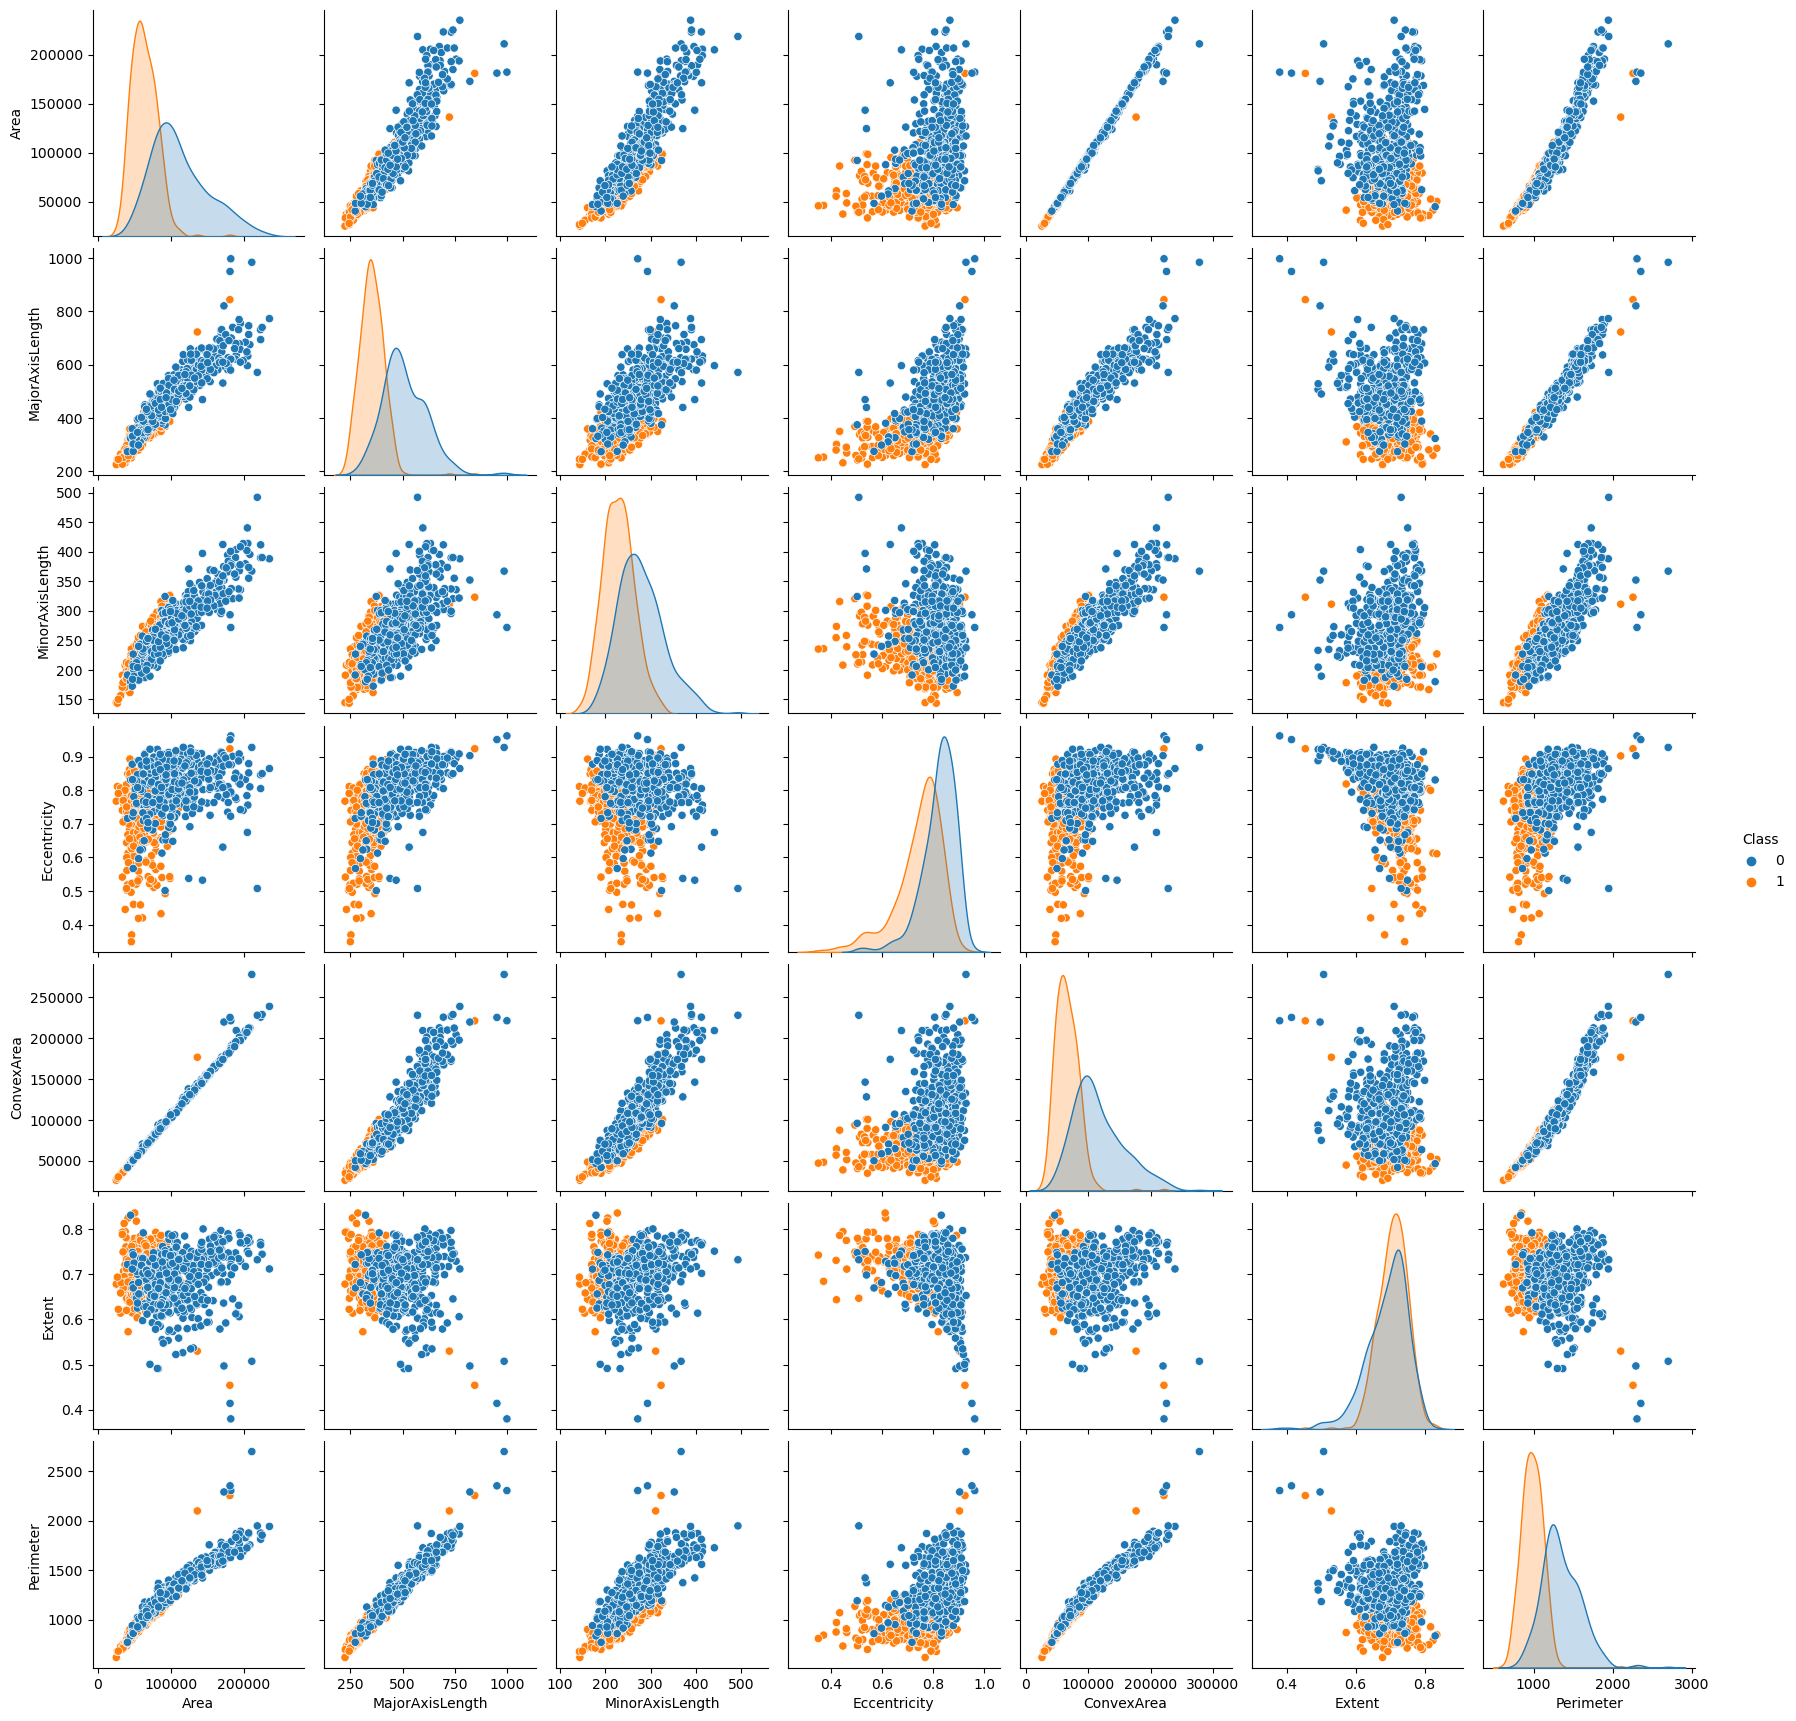

In [9]:
sns.pairplot(df_num_class,
             vars=df_num_class.keys()[:-1],
            hue ='Class')
plt.show()

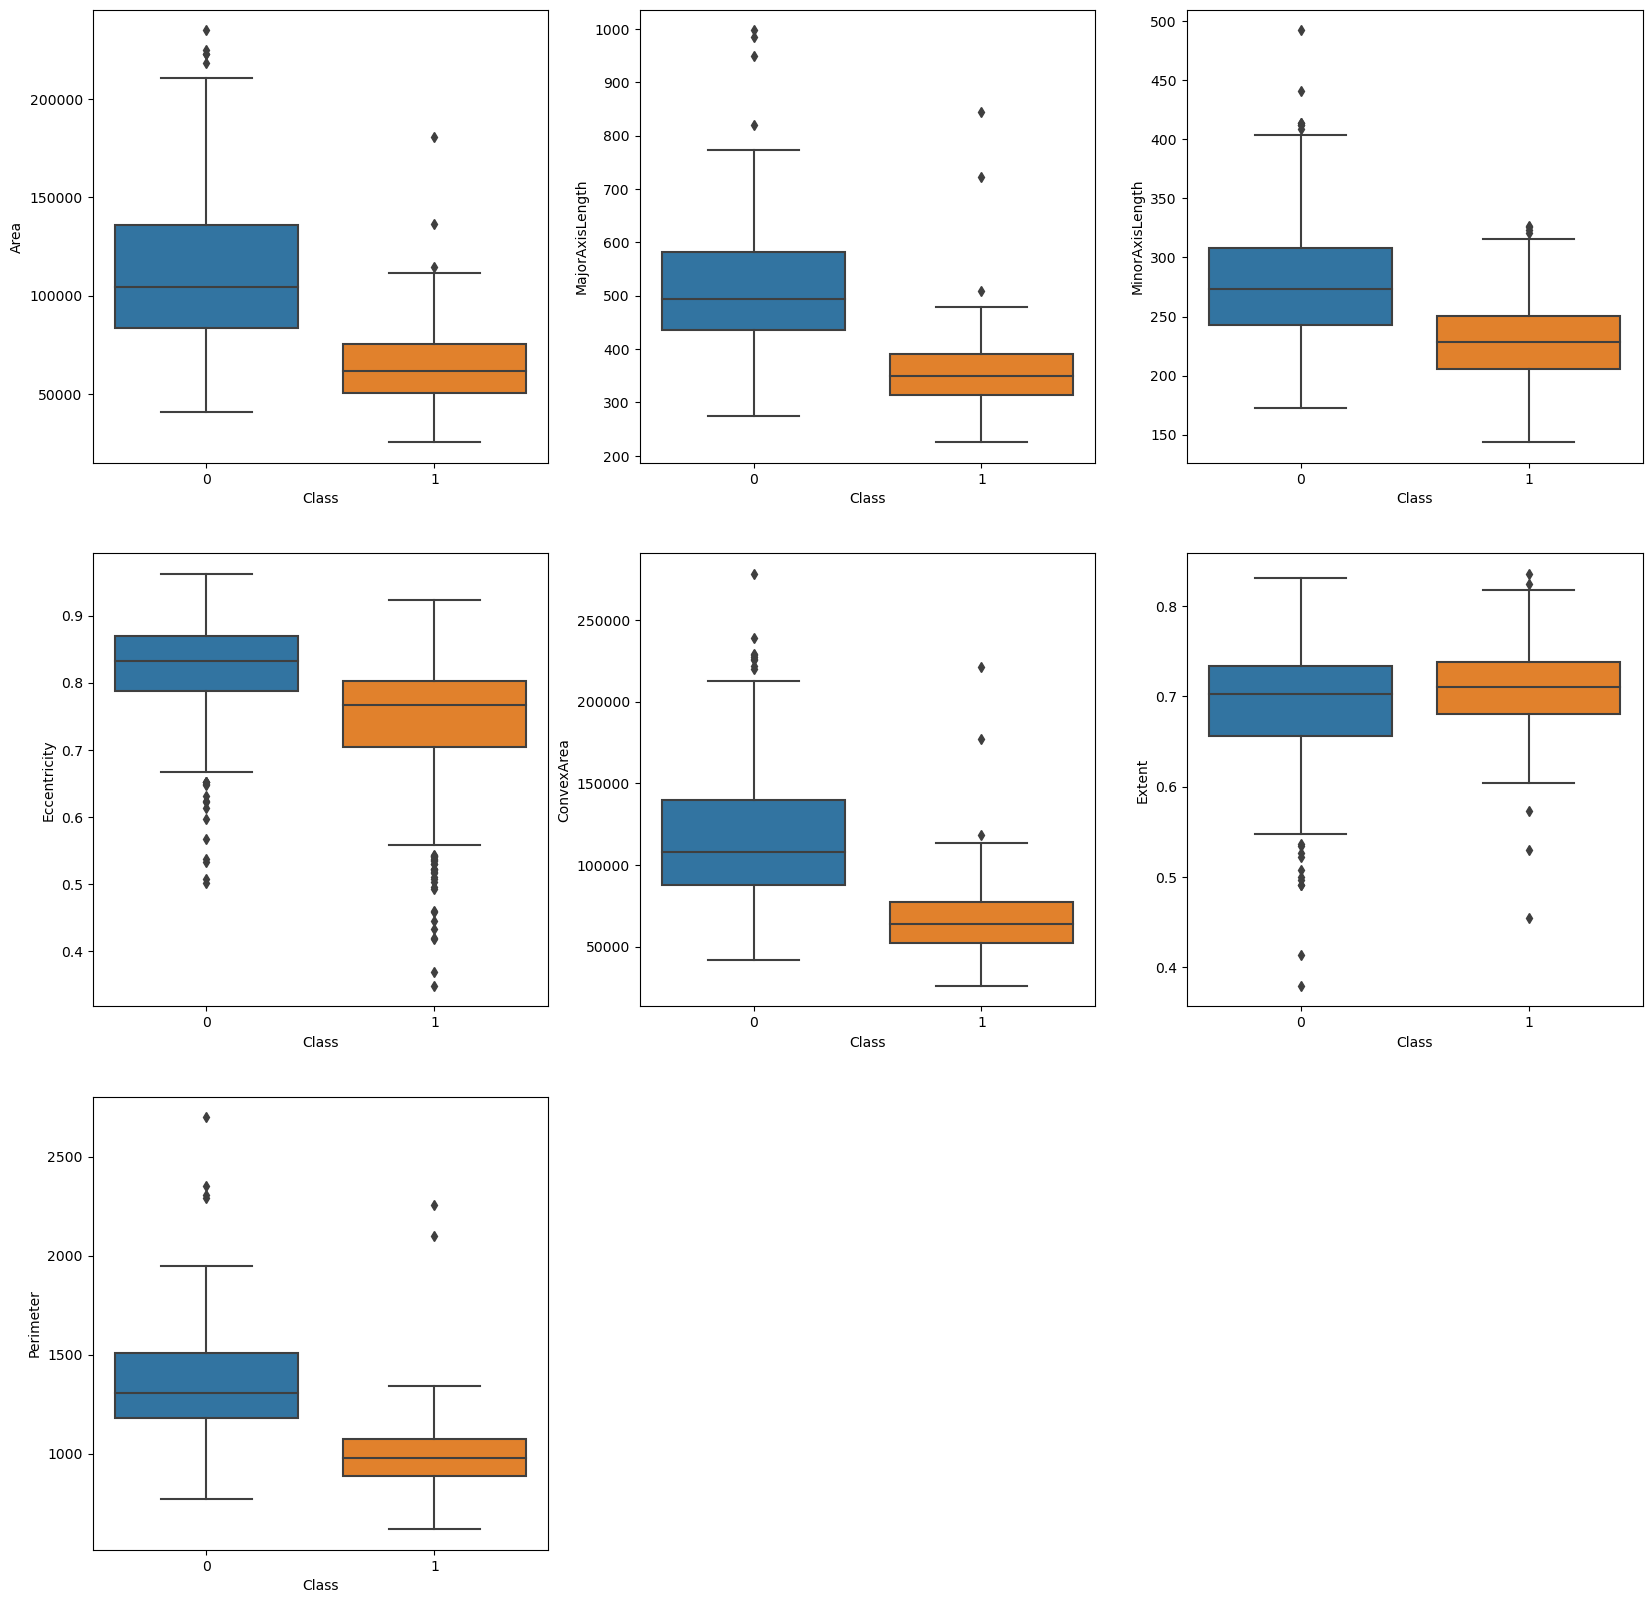

In [10]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature,data=df)
plt.show()

In [11]:
from tensorflow.keras.utils import to_categorical
x = df.loc[:, ["Area", "MajorAxisLength", "Perimeter", "Eccentricity"]].values
x = df.drop(['Class'], axis=1).values
y = to_categorical(df.Class.values)
x[0], y[0]

(array([8.75240000e+04, 4.42246011e+02, 2.53291155e+02, 8.19738392e-01,
        9.05460000e+04, 7.58650579e-01, 1.18404000e+03]),
 array([0., 1.], dtype=float32))

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((630, 7), (270, 7), (630, 2), (270, 2))

In [13]:
from tensorflow import keras as ke

In [14]:
model = ke.Sequential()
model.add(ke.layers.Input(x.shape[1]))
model.add(ke.layers.BatchNormalization())
model.add(ke.layers.Dense(16, ke.activations.relu))
model.add(ke.layers.Dense(16, ke.activations.relu))
model.add(ke.layers.Dense(2, ke.activations.softmax, kernel_regularizer=ke.regularizers.l2()))
model.compile(ke.optimizers.legacy.Adam(learning_rate=2e-5), loss=ke.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 7)                 28        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 462 (1.80 KB)
Trainable params: 448 (1.75 KB)
Non-trainable params: 14 (56.00 Byte)
_________________________________________________________________


2023-09-22 13:54:23.360461: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-22 13:54:23.360712: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
from tqdm.keras import TqdmCallback
history = model.fit(x_train, y_train, epochs=100, validation_data=(
    x_test, y_test), verbose=0, callbacks=[TqdmCallback(verbose=1)])


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2023-09-22 13:54:23.979885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-22 13:54:24.657621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


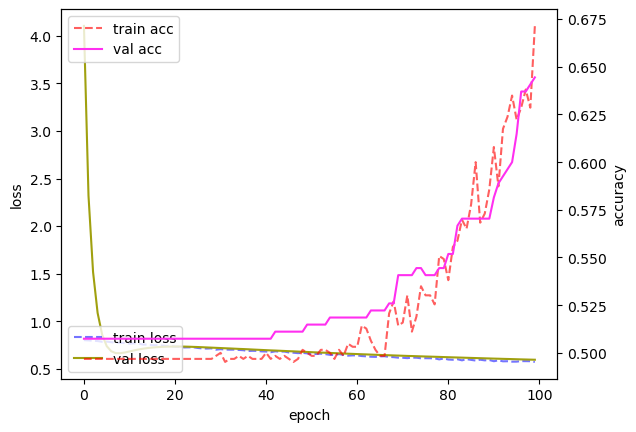

In [16]:
def history_to_graph(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], '#2222ffa0', label='train loss', linestyle='dashed')
    loss_ax.plot(hist.history['val_loss'], '#a0a00f', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='lower left')

    acc_ax.plot(hist.history['accuracy'], '#ff0000a0', label='train acc', linestyle='dashed')
    acc_ax.plot(hist.history['val_accuracy'], '#ff2ff0', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper left')

    plt.show()
history_to_graph(history)

2023-09-22 13:55:02.025724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


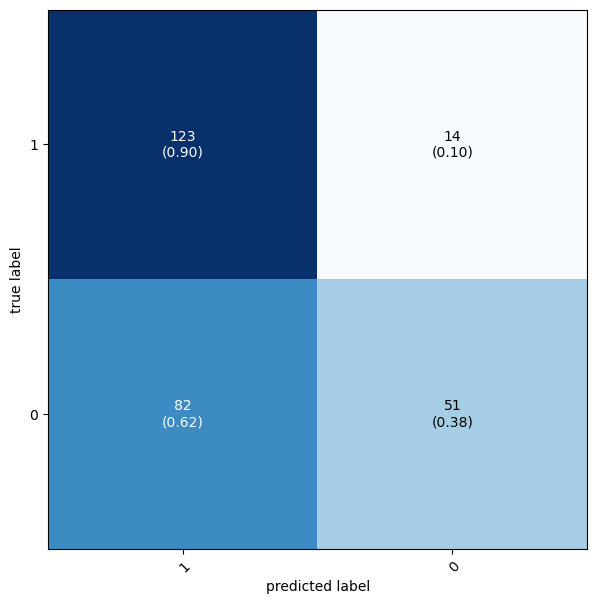

In [17]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
classes = df.Class.value_counts().keys()

predict_x = model.predict(x_test, verbose=0) 
y_pred_class = np.argmax(predict_x, axis=1)

mat = confusion_matrix(np.argmax(y_test, axis=1), y_pred_class)
plot_confusion_matrix(conf_mat=mat, class_names=classes, show_normed=True, figsize=(7,7))
plt.show()

In [18]:
x = df
x.drop(columns=['Class'], axis=1)
y = df.Class

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((675, 8), (225, 8), (675,), (225,))

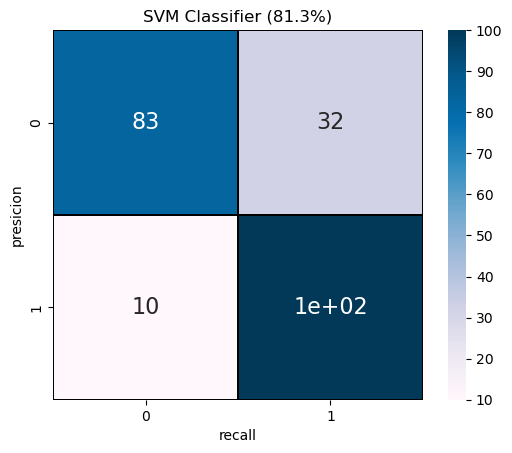

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

def estimate_model(model, name, x_test, y_test):
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    conf_matr = confusion_matrix(y_test, pred)
    colormap = plt.cm.PuBu
    plt.title(f"{name} ({accuracy*100:.1f}%)")
    sns.heatmap(conf_matr, linewidths = 0.1,
            square = True, cmap = colormap, linecolor = "black", annot = True, annot_kws = {"size" : 16, })

    plt.xlabel("recall")
    plt.ylabel("presicion")
    plt.show()
clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

estimate_model(clf_svm, "SVM Classifier", x_test, y_test)

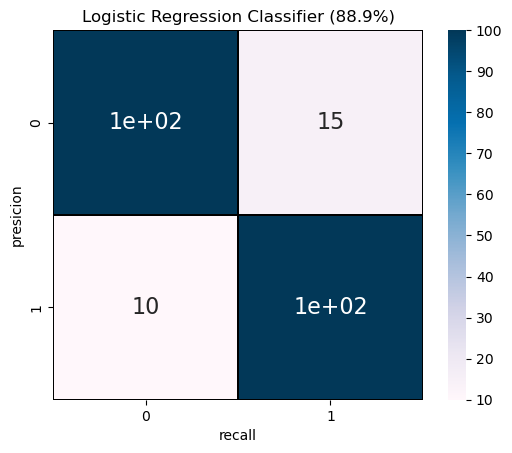

In [21]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

estimate_model(clf_lr, "Logistic Regression Classifier", x_test, y_test)

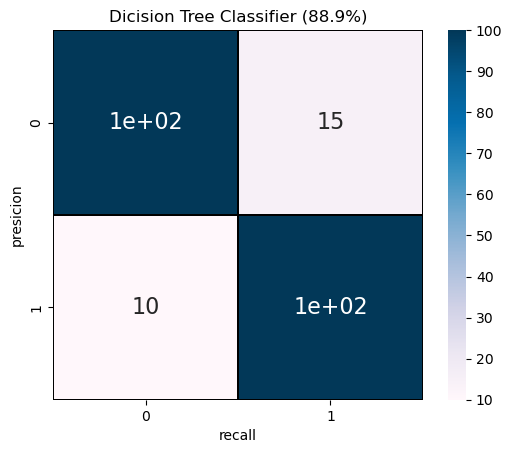

In [22]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

estimate_model(clf_lr, "Dicision Tree Classifier", x_test, y_test)

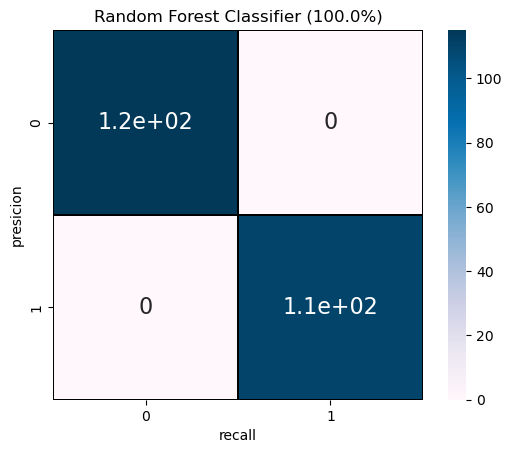

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
estimate_model(rf_clf, "Random Forest Classifier", x_test, y_test)

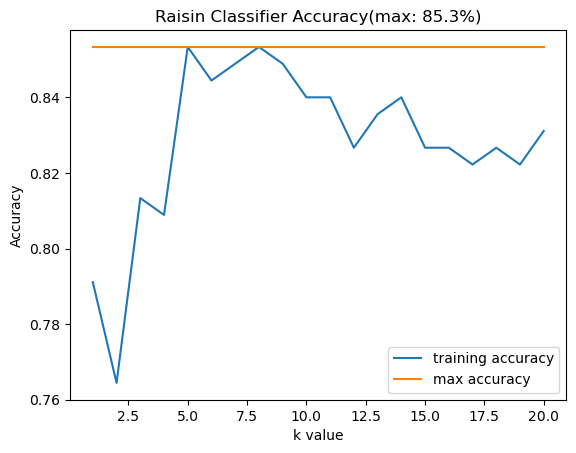

In [24]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 21)
find_accuracy = []

for k in k_range:
    find_model = KNeighborsClassifier(n_neighbors = k)
    find_model.fit(x_train, y_train.values.ravel())

    find_accuracy.append(find_model.score(x_test.values, y_test))
    
max_accuracy = max(find_accuracy)
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.plot(k_range, [max_accuracy]*len(k_range), label="max accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title(f"Raisin Classifier Accuracy(max: {max_accuracy*100:.1f}%)")
plt.legend()
plt.show()